# **Deep learning Lab Assignment**
**Name:** Ayush Rewatkar    
**Div:** A  
**Batch:** DL-1  
**Roll No:** 12  
**PRN No:** 202201040033  

**Import Required Libraries**

In [3]:
# Required imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam


**Load and Preprocess the Titanic Dataset**

In [5]:
# Load Titanic dataset
file_path = "/content/Titanic-Dataset.csv"
df = pd.read_csv(file_path)

# Select relevant features and target variable
features = ["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch"]
target = "Survived"

# Drop rows with missing target values
df = df.dropna(subset=[target])

# Encode categorical variable 'Sex'
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])

# Fill missing values in numerical columns with their median
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Fare"].fillna(df["Fare"].median(), inplace=True)

# Prepare features and target variable
X = df[features].values
y = df[target].values

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<ipython-input-5-2b9cb408102a>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
<ipython-input-5-2b9cb408102a>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

**Train a Logistic Regression Model**

In [6]:
# Train Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = log_model.predict_proba(X_test)[:, 1]

# Compute Log Loss
loss = log_loss(y_test, y_pred_prob)
print(f"Log Loss: {loss:.4f}")

# Compute Accuracy
y_pred = log_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Log Loss: 0.4512
Logistic Regression Accuracy: 0.8022

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       165
           1       0.75      0.74      0.74       103

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



**Train a Neural Network using TensorFlow**

In [7]:
# Define Neural Network Model
nn_model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer with selected features
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (Survived or Not)
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5035 - loss: 0.7016 - val_accuracy: 0.7761 - val_loss: 0.5426
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8221 - loss: 0.5006 - val_accuracy: 0.7910 - val_loss: 0.4664
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7963 - loss: 0.4523 - val_accuracy: 0.7985 - val_loss: 0.4446
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8273 - loss: 0.4087 - val_accuracy: 0.8060 - val_loss: 0.4364
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8034 - loss: 0.4617 - val_accuracy: 0.8060 - val_loss: 0.4296
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8126 - loss: 0.4066 - val_accuracy: 0.8022 - val_loss: 0.4267
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8101 - loss: 0.4104 - val_accuracy: 0.8172 - val_loss: 0.4253
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8507 - loss: 0.3707 - val_accuracy: 0.8246 - 

**Plot Training Loss for Neural Network**

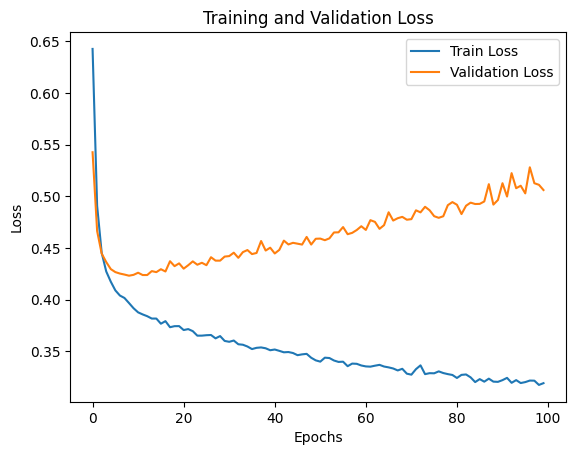

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8092 - loss: 0.4659 

Neural Network Test Accuracy: 0.7836


In [8]:
# Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# Evaluate model
loss, accuracy = nn_model.evaluate(X_test, y_test)
print(f"\nNeural Network Test Accuracy: {accuracy:.4f}")


**Implement a Manual ANN using NumPy**

In [9]:
# Initialize ANN Parameters
input_size = X_train.shape[1]
hidden_layer1_size = 128
hidden_layer2_size = 64
output_size = 1  # Binary Classification (0 or 1)

np.random.seed(42)
W1 = np.random.randn(input_size, hidden_layer1_size) * np.sqrt(2.0 / input_size)
b1 = np.zeros((1, hidden_layer1_size))
W2 = np.random.randn(hidden_layer1_size, hidden_layer2_size) * np.sqrt(2.0 / hidden_layer1_size)
b2 = np.zeros((1, hidden_layer2_size))
W3 = np.random.randn(hidden_layer2_size, output_size) * np.sqrt(2.0 / hidden_layer2_size)
b3 = np.zeros((1, output_size))

# Activation functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Loss function (Binary Cross-Entropy)
def binary_cross_entropy(y_pred, y_true):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m


**Train the Manual ANN**

In [10]:
# Backpropagation
def backpropagation(X, y, W1, b1, W2, b2, W3, b3, learning_rate=0.01):
    m = X.shape[0]

    # Forward propagation
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = relu(Z2)
    Z3 = np.dot(A2, W3) + b3
    A3 = sigmoid(Z3)

    # Compute loss
    loss = binary_cross_entropy(A3, y.reshape(-1, 1))

    # Backward propagation
    dZ3 = A3 - y.reshape(-1, 1)
    dW3 = np.dot(A2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m
    dZ2 = np.dot(dZ3, W3.T) * relu_derivative(Z2)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dZ1 = np.dot(dZ2, W2.T) * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Update parameters
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    return W1, b1, W2, b2, W3, b3, loss


**Evaluate the Manual ANN**

In [11]:
# Predict on test set
Z1_test = np.dot(X_test, W1) + b1
A1_test = relu(Z1_test)
Z2_test = np.dot(A1_test, W2) + b2
A2_test = relu(Z2_test)
Z3_test = np.dot(A2_test, W3) + b3
A3_test = sigmoid(Z3_test)

# Convert predictions to class labels
y_pred = (A3_test > 0.5).astype(int).flatten()
accuracy = accuracy_score(y_test, y_pred)
print(f"\nManual ANN Test Accuracy: {accuracy:.4f}")



Manual ANN Test Accuracy: 0.4963
